In [1]:
import os
from os.path import expanduser
import numpy as np
home_dir = expanduser("~")
result_dir = 'results/'
import datetime
import codecs, json
import math
import time
import random
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
np.random.seed(999)
random.seed(999)

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
save_figs = 1

# Load benchmark 1

In [3]:
### Load the benchmark
name_of_bench_1 = 'GPU_float16_neurons_per_layer_2018-05-06'

### Load the CPU json file
with open(result_dir + name_of_bench_1 + '.json', 'r') as f:
    json_data_1 = json.load(f)
f.close()

In [4]:
time_array_1 = np.array(json_data_1[0])
json_info_dict_1 = json_data_1[1]
print(time_array_1)
print(json_info_dict_1)

[9.09418121 9.03618036 9.05725038 9.159822   9.21930098 9.32079853]
{'On_CPU_only': False, 'number_of_epochs': [1000.0], 'training_set_size': [300000.0], 'input_features': ['Halo_mass', 'Halo_mass_peak', 'Concentration', 'Halo_spin'], 'output_features': ['Stellar_mass'], 'tested_parameter': 'neurons_per_layer', 'tested_values': [10, 20, 30, 50, 70, 100], 'batch_size': [10000.0], 'nr_of_layers': [10], 'activation_function': 'tanh', 'precision': 'float16', 'neurons_per_layer': [1000]}


In [5]:
if json_info_dict_1['tested_parameter'] == 'batch_size': 
    param_string_1 = 'nr of Layers: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (json_info_dict_1['nr_of_layers'][0], json_info_dict_1['activation_function'], 
    json_info_dict_1['neurons_per_layer'][0], json_info_dict_1['training_set_size'][0])
elif json_info_dict_1['tested_parameter'] == 'nLayers': 
    param_string_1 = 'batch size: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_1['batch_size'][0], json_info_dict_1['activation_function'], 
    json_info_dict_1['neurons_per_layer'][0], json_info_dict_1['training_set_size'][0])
elif json_info_dict_1['tested_parameter'] == 'neurons_per_layer': 
    param_string_1 = 'nr of Layers: %d, activation function: %s, batch size: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_1['nr_of_layers'][0], json_info_dict_1['activation_function'], 
    json_info_dict_1['batch_size'][0], json_info_dict_1['training_set_size'][0])
elif json_info_dict_1['tested_parameter'] == 'actfun': 
    param_string_1 = 'nr of Layers: %d, batch size: %d, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_1['nr_of_layers'][0], json_info_dict_1['batch_size'][0], 
    json_info_dict_1['neurons_per_layer'][0], json_info_dict_1['training_set_size'][0])

# Load bench 2

In [6]:
### Load the benchmark
name_of_bench_2 = 'GPU_float32_neurons_per_layer_2018-05-06'
### Load the GPU json file
with open(result_dir + name_of_bench_2 + '.json', 'r') as f:
    json_data_2 = json.load(f)
f.close()

In [7]:
time_array_2 = np.array(json_data_2[0])
json_info_dict_2 = json_data_2[1]
print(time_array_2)
print(json_info_dict_2)

[8.82410872 9.08347435 9.22069895 9.23536951 9.3890998  9.40979435]
{'On_CPU_only': False, 'number_of_epochs': [1000.0], 'training_set_size': [300000.0], 'input_features': ['Halo_mass', 'Halo_mass_peak', 'Concentration', 'Halo_spin'], 'output_features': ['Stellar_mass'], 'tested_parameter': 'neurons_per_layer', 'tested_values': [10, 20, 30, 50, 70, 100], 'batch_size': [10000.0], 'nr_of_layers': [10], 'activation_function': 'tanh', 'precision': 'float32', 'neurons_per_layer': [1000]}


In [8]:
if json_info_dict_2['tested_parameter'] == 'batch_size': 
    param_string_2 = 'nr of Layers: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (json_info_dict_2['nr_of_layers'][0], json_info_dict_2['activation_function'], 
    json_info_dict_2['neurons_per_layer'][0], json_info_dict_2['training_set_size'][0])
elif json_info_dict_2['tested_parameter'] == 'nLayers': 
    param_string_2 = 'batch size: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_2['batch_size'][0], json_info_dict_2['activation_function'], 
    json_info_dict_2['neurons_per_layer'][0], json_info_dict_2['training_set_size'][0])
elif json_info_dict_2['tested_parameter'] == 'neurons_per_layer': 
    param_string_2 = 'nr of Layers: %d, activation function: %s, batch size: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_2['nr_of_layers'][0], json_info_dict_2['activation_function'], 
    json_info_dict_2['batch_size'][0], json_info_dict_2['training_set_size'][0])
elif json_info_dict_2['tested_parameter'] == 'actfun': 
    param_string_2 = 'nr of Layers: %d, batch size: %d, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_2['nr_of_layers'][0], json_info_dict_2['batch_size'][0], 
    json_info_dict_2['neurons_per_layer'][0], json_info_dict_2['training_set_size'][0])

# Plot the performance from one benchmark

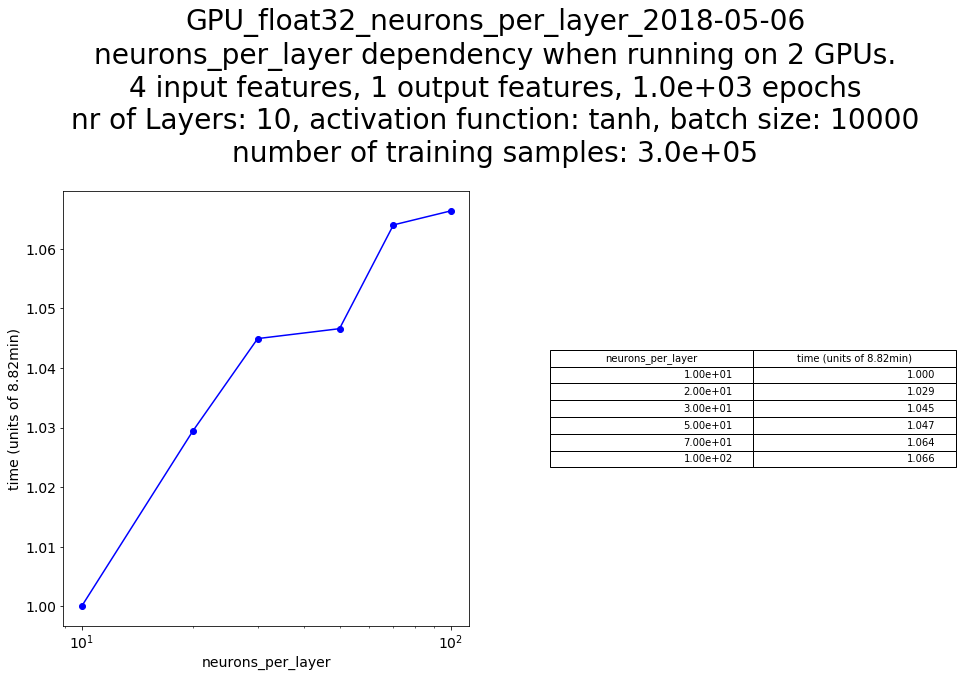

In [16]:
### Choose which benchmark to look at
bench = 2 # 1 or 2

if bench == 1:
    time_array = time_array_1
    json_info_dict = json_info_dict_1
    name_of_benchmark = name_of_bench_1
    json_data = json_data_1
    param_string = param_string_1
elif bench == 2:
    time_array = time_array_2
    json_info_dict = json_info_dict_2
    name_of_benchmark = name_of_bench_2
    json_data = json_data_2
    param_string = param_string_2
    
time_unit = time_array[0]
time_array = time_array / time_unit


plot_chars = {'batch_size': 'b-o', 'nr_of_layers': 'b-o', 'activation_functions': 'bo', 'neurons_per_layer': 'b-o', }
param = json_info_dict['tested_parameter']
char_size_multiplier = 7

if json_info_dict['On_CPU_only']:
    cpu_gpu_string = 'CPU'
else:
    cpu_gpu_string = '2 GPUs'
    

fig = plt.figure(figsize=(16,8))

ax = plt.subplot(1,2,1)
plt.plot(json_info_dict['tested_values'], time_array, plot_chars[param])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(param, fontsize=2*char_size_multiplier)
plt.ylabel('time (units of %.2fmin)' % (time_unit), fontsize=2*char_size_multiplier)
#plt.title(param, fontsize=3*char_size_multiplier)
ax.tick_params(axis='both', labelsize=2*char_size_multiplier)

ax = plt.subplot(1,2,2)
collabel=(param, 'time (units of %.2fmin)' % (time_unit))
ax.axis('tight')
ax.axis('off')

table_vals = []
for i in range(len(json_info_dict['tested_values'])):
    if type(json_info_dict['tested_values'][i]) is str:
        table_vals.append([json_info_dict['tested_values'][i], '%.3f' % (time_array[i])])
    else:
        table_vals.append(['%.2e' % (json_info_dict['tested_values'][i]), '%.3f' % (time_array[i])])

the_table = ax.table(cellText=table_vals,colLabels=collabel,loc='center')
the_table.scale(1, 1.4)
    
plt.suptitle(name_of_benchmark + 
    '\n' + param + ' dependency when running on %s.\n%d input features, %d output features, %.1e epochs\n' % 
    (cpu_gpu_string, len(json_data[1]['input_features']), len(json_data[1]['output_features']), 
    json_data[1]['number_of_epochs'][0]) + param_string, y=1.2, fontsize=4*char_size_multiplier)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)
#plt.tight_layout()

plt.show()

In [18]:
if save_figs:
    fig.savefig(result_dir + name_of_benchmark + '.png', bbox_inches = 'tight')

# Plot the speedup

In [17]:
### Make sure that the benchmarks are equal
all_clear = True
for i_key, key in enumerate(json_info_dict_1.keys()):
    if i_key > 0:
        if json_info_dict_1[key] != json_info_dict_2[key]:
            print('Dictionary key:   ', key)
            print('CPU benchmark:   ', json_info_dict_1[key])
            print('GPU benchmark:   ', json_info_dict_2[key])
            all_clear = False
if all_clear:
    print('Benchmarks are the same, suitable for comparison.')

Dictionary key:    precision
CPU benchmark:    float16
GPU benchmark:    float32


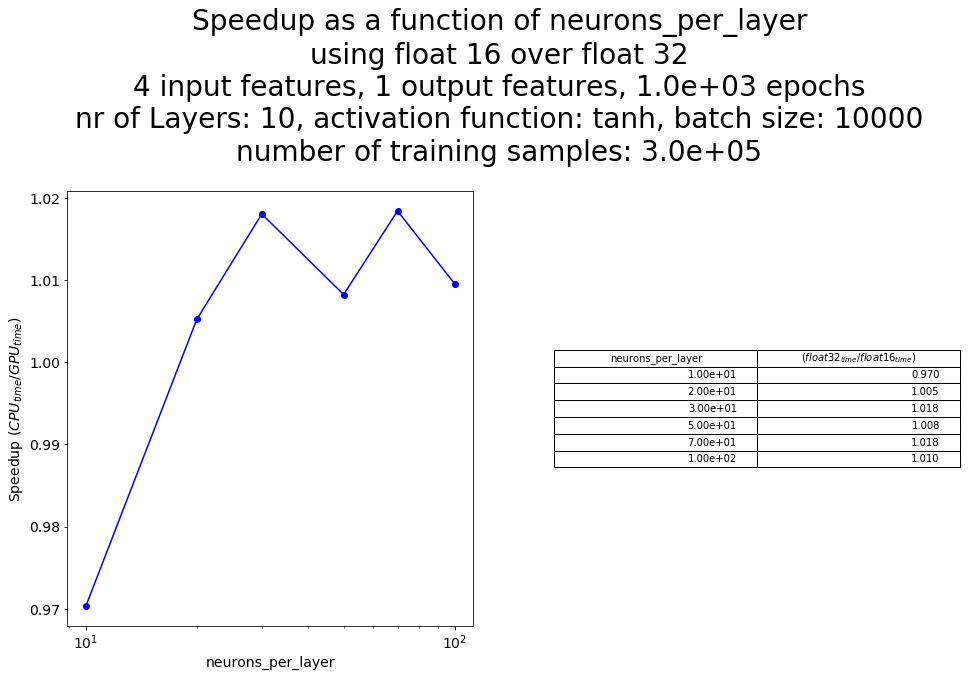

In [19]:
json_info_dict = json_info_dict_2
json_data = json_data_2
param_string = param_string_2
bench_diff = time_array_2 / time_array_1

plot_chars = {'batch_size': 'b-o', 'nr_of_layers': 'b-o', 'activation_functions': 'bo', 'neurons_per_layer': 'b-o', }
param = json_info_dict['tested_parameter']
char_size_multiplier = 7

fig = plt.figure(figsize=(16,8))

ax = plt.subplot(1,2,1)
plt.plot(json_info_dict['tested_values'], bench_diff, plot_chars[param])
plt.xscale('log')
plt.xlabel(param, fontsize=2*char_size_multiplier)
plt.ylabel('Speedup $(CPU_{time}/GPU_{time})$', fontsize=2*char_size_multiplier)
#plt.title('Speedup for batch sizes using 2 GPUs over 1 CPU', fontsize=3*char_size_multiplier)
ax.tick_params(axis='both', labelsize=2*char_size_multiplier)

ax = plt.subplot(1,2,2)
collabel=(param, "$(float32_{time}/float16_{time})$")
ax.axis('tight')
ax.axis('off')

table_vals = []
for i in range(len(json_info_dict['tested_values'])):
    if type(json_info_dict['tested_values'][i]) is str:
        table_vals.append([json_info_dict['tested_values'][i], '%.3f' % (bench_diff[i])])
    else:
        table_vals.append(['%.2e' % (json_info_dict['tested_values'][i]), '%.3f' % (bench_diff[i])])

the_table = ax.table(cellText=table_vals,colLabels=collabel,loc='center')
the_table.scale(1, 1.4)
    
plt.suptitle('Speedup as a function of ' + param + '\nusing float 16 over float 32\n%d input features, %d output features, %.1e epochs\n' % ( 
    len(json_data[1]['input_features']), len(json_data[1]['output_features']), json_data[1]['number_of_epochs'][0]) + 
    param_string, 
    y=1.2, fontsize=4*char_size_multiplier)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)
#plt.tight_layout()

plt.show()

In [20]:
date_string = datetime.datetime.now().strftime("%Y-%m-%d")
if save_figs:
    fig.savefig(result_dir + 'float16_32_comparison_' + date_string + '_' + param + '.png', bbox_inches = 'tight')